***Connecting Kaggle***

In [ ]:
import json
import os

# Make sure you replace these strings with the actual contents of your kaggle.json file
kaggle_user = "aroojimtiaz"
kaggle_key = "__________________________________________________"

# Ensure the .kaggle directory exists
os.makedirs(os.path.join(os.path.expanduser("~"), ".kaggle"), exist_ok=True)

# Write the kaggle.json file
with open(os.path.join(os.path.expanduser("~"), ".kaggle", "kaggle.json"), 'w') as file:
    json.dump({"username": kaggle_user, "key": kaggle_key}, file)

# Adjust file permissions
os.chmod(os.path.join(os.path.expanduser("~"), ".kaggle", "kaggle.json"), 0o600)

os.environ["KAGGLE_USERNAME"] = "aroojimtiaz"
os.environ["KAGGLE_KEY"] = "________________________________________________________"

***Downloading Dataset from Kaggle***

In [ ]:
!kaggle datasets download -d vijaygiitk/multiclass-weather-dataset

 98% 132M/134M [00:00<00:00, 179MB/s]
100% 134M/134M [00:00<00:00, 170MB/s]


***Unzipping the Zipped File***

In [ ]:
from zipfile import ZipFile
file_name = "/content/multiclass-weather-dataset.zip"
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('done')

done


***Getting the Paths***

In [ ]:
import warnings
warnings.filterwarnings('ignore')
data_dir_list = os.listdir('/content/dataset')
print(data_dir_list)
path, dirs, files = next(os.walk("/content/dataset"))
file_count = len(files)

['foggy', 'shine', 'rainy', 'test.csv', 'alien_test', 'cloudy', 'sunrise']


***Creating New Directory***

In [ ]:
original_dataset_dir = '/content/dataset'
base_dir = '/content/weather-data/'
os.mkdir(base_dir)

***Creating Two Folders (Train and Validate)***

In [ ]:
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

train_cloud_dir = os.path.join(train_dir, 'cloudy')
os.mkdir(train_cloud_dir)

train_foggy_dir = os.path.join(train_dir, 'foggy')
os.mkdir(train_foggy_dir)

train_rainy_dir = os.path.join(train_dir, 'rainy')
os.mkdir(train_rainy_dir)

train_shine_dir = os.path.join(train_dir, 'shine')
os.mkdir(train_shine_dir)

train_sunrise_dir = os.path.join(train_dir, 'sunrise')
os.mkdir(train_sunrise_dir)

validation_cloud_dir = os.path.join(validation_dir, 'cloudy')
os.mkdir(validation_cloud_dir)

validation_foggy_dir = os.path.join(validation_dir, 'foggy')
os.mkdir(validation_foggy_dir)

validation_rainy_dir = os.path.join(validation_dir, 'rainy')
os.mkdir(validation_rainy_dir)

validation_shine_dir = os.path.join(validation_dir, 'shine')
os.mkdir(validation_shine_dir)

validation_sunrise_dir = os.path.join(validation_dir, 'sunrise')
os.mkdir(validation_sunrise_dir)

***Splitting Data into Folders***

In [ ]:
def split_data(SOURCE, TRAINING, VALIDATION, SPLIT_SIZE):
    files = []
    for filename in os.listdir(SOURCE):
        file = SOURCE + filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + " is zero length, so ignoring.")

    training_length = int(len(files) * SPLIT_SIZE)
    valid_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    valid_set = shuffled_set[training_length:]

    for filename in training_set:
        this_file = SOURCE + filename
        destination = TRAINING + filename
        copyfile(this_file, destination)

    for filename in valid_set:
        this_file = SOURCE + filename
        destination = VALIDATION + filename
        copyfile(this_file, destination)

In [ ]:
CLOUDY_SOURCE_DIR = '/content/dataset/cloudy/'
TRAINING_CLOUDY_DIR = '/content/weather-data/train/cloudy/'
VALID_CLOUDY_DIR = '/content/weather-data/validation/cloudy/'

FOGGY_SOURCE_DIR = '/content/dataset/foggy/'
TRAINING_FOGGY_DIR = '/content/weather-data/train/foggy/'
VALID_FOGGY_DIR = '/content/weather-data/validation/foggy/'

RAINY_SOURCE_DIR = '/content/dataset/rainy/'
TRAINING_RAINY_DIR = '/content/weather-data/train/rainy/'
VALID_RAINY_DIR = '/content/weather-data/validation/rainy/'

SHINE_SOURCE_DIR = '/content/dataset/shine/'
TRAINING_SHINE_DIR = '/content/weather-data/train/shine/'
VALID_SHINE_DIR = '/content/weather-data/validation/shine/'

SUNRISE_SOURCE_DIR = '/content/dataset/sunrise/'
TRAINING_SUNRISE_DIR = '/content/weather-data/train/sunrise/'
VALID_SUNRISE_DIR = '/content/weather-data/validation/sunrise/'

In [ ]:
import os
import random
from shutil import copyfile

split_size = .85

split_data(CLOUDY_SOURCE_DIR, TRAINING_CLOUDY_DIR, VALID_CLOUDY_DIR, split_size)
split_data(FOGGY_SOURCE_DIR, TRAINING_FOGGY_DIR, VALID_FOGGY_DIR, split_size)
split_data(RAINY_SOURCE_DIR, TRAINING_RAINY_DIR, VALID_RAINY_DIR, split_size)
split_data(SHINE_SOURCE_DIR, TRAINING_SHINE_DIR, VALID_SHINE_DIR, split_size)
split_data(SUNRISE_SOURCE_DIR, TRAINING_SUNRISE_DIR, VALID_SUNRISE_DIR, split_size)

***Visualizing Training Folders***

In [ ]:
import os
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread
import pathlib
import numpy as np

image_folder = ['cloudy', 'foggy', 'rainy', 'shine', 'sunrise']
img = {}
for i in image_folder:
    images = len(os.listdir('/content/weather-data/train/' + i + '/'))
    img[i] = images

fig = px.bar(x=list(img.keys()), y=list(img.values()))
fig.update_layout(
    title={
        'text': 'Distribution of different classes in Training Dataset',
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    xaxis_title='Weather Condition',
    yaxis_title='Number of Images'
)

fig.update_xaxes(tickvals=np.arange(len(img)) + 0.5, ticktext=list(img.keys()))

fig.show()

In [ ]:
for i in ['cloudy', 'foggy', 'rainy', 'shine', 'sunrise']:
    print('Training {} images are: '.format(i)+str(len(os.listdir('/content/weather-data/train/'+i+'/'))))

Training cloudy images are: 255
Training foggy images are: 255
Training rainy images are: 255
Training shine images are: 212
Training sunrise images are: 297


***Data Augmentation***

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
img_width=256; img_height=256
batch_size=16

In [ ]:
train_dir = '/content/weather-data/train/'

train_datagen = ImageDataGenerator(rescale = 1/255.0,
                                   rotation_range=30,
                                   zoom_range=0.4,
                                   horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    target_size=(img_height, img_width))

Found 1274 images belonging to 5 classes.


In [ ]:
Val_dir = '/content/weather-data/validation/'

validation_datagen = ImageDataGenerator(rescale = 1/255.0)

validation_generator = validation_datagen.flow_from_directory(Val_dir,
                                                              batch_size=batch_size,
                                                              class_mode='categorical',
                                                              target_size=(img_height, img_width)
                                                             )

Found 226 images belonging to 5 classes.


In [ ]:
callbacks = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')
# autosave best Model
best_model_file = '/content/CNN_aug_best_weights.h5'
best_model = ModelCheckpoint(best_model_file, monitor='val_acc', verbose = 1, save_best_only = True)

***Creating Model***

In [ ]:
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)), MaxPooling2D(2, 2),
    Conv2D(32, (3, 3), activation='relu'), MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(256, (3, 3), activation='relu'),
    Conv2D(256, (3, 3), activation='relu'),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(512, activation='relu'),
    Dense(5, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 58, 58, 64)        3

***Compiling Model***

In [ ]:
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics =['accuracy'])

***Fitting Model***

In [ ]:
history = model.fit_generator(train_generator,
                              epochs=30,
                              verbose=1,
                              validation_data=validation_generator,
                              callbacks = [best_model]
                              )

Epoch 1/30
80/80 [==============================] - ETA: 0s - loss: 1.4715 - accuracy: 0.3046

80/80 [==============================] - 34s 322ms/step - loss: 1.4715 - accuracy: 0.3046 - val_loss: 1.2536 - val_accuracy: 0.4115
Epoch 2/30
80/80 [==============================] - ETA: 0s - loss: 1.2292 - accuracy: 0.4443

80/80 [==============================] - 26s 319ms/step - loss: 1.2292 - accuracy: 0.4443 - val_loss: 1.0599 - val_accuracy: 0.5531
Epoch 3/30
80/80 [==============================] - ETA: 0s - loss: 1.0233 - accuracy: 0.5691

80/80 [==============================] - 25s 307ms/step - loss: 1.0233 - accuracy: 0.5691 - val_loss: 1.0662 - val_accuracy: 0.5796
Epoch 4/30
80/80 [==============================] - ETA: 0s - loss: 1.0917 - accuracy: 0.5675

80/80 [==============================] - 25s 311ms/step - loss: 1.0917 - accuracy: 0.5675 - val_loss: 0.8607 - val_accuracy: 0.6681
Epoch 5/30
80/80 [==============================] - ETA: 0s - loss: 0.8890 - accuracy: 0.6319

80/80 [==============================] - 27s 331ms/step - loss: 0.8890 - accuracy: 0.6319 - val_loss: 0.8134 - val_accuracy: 0.6416
Epoch 6/30
80/80 [==============================] - ETA: 0s - loss: 0.8923 - accuracy: 0.6358

80/80 [==============================] - 25s 313ms/step - loss: 0.8923 - accuracy: 0.6358 - val_loss: 0.7566 - val_accuracy: 0.6814
Epoch 7/30
80/80 [==============================] - ETA: 0s - loss: 0.8546 - accuracy: 0.6460

80/80 [==============================] - 25s 310ms/step - loss: 0.8546 - accuracy: 0.6460 - val_loss: 0.7614 - val_accuracy: 0.6637
Epoch 8/30
80/80 [==============================] - ETA: 0s - loss: 0.9711 - accuracy: 0.6107

80/80 [==============================] - 25s 312ms/step - loss: 0.9711 - accuracy: 0.6107 - val_loss: 0.8574 - val_accuracy: 0.6593
Epoch 9/30
80/80 [==============================] - ETA: 0s - loss: 0.9260 - accuracy: 0.6279

80/80 [==============================] - 25s 317ms/step - loss: 0.9260 - accuracy: 0.6279 - val_loss: 0.9387 - val_accuracy: 0.6416
Epoch 10/30
80/80 [==============================] - ETA: 0s - loss: 0.8952 - accuracy: 0.6350

80/80 [==============================] - 25s 314ms/step - loss: 0.8952 - accuracy: 0.6350 - val_loss: 0.8519 - val_accuracy: 0.6283
Epoch 11/30
80/80 [==============================] - ETA: 0s - loss: 0.8467 - accuracy: 0.6389

80/80 [==============================] - 26s 324ms/step - loss: 0.8467 - accuracy: 0.6389 - val_loss: 0.8155 - val_accuracy: 0.6504
Epoch 12/30
80/80 [==============================] - ETA: 0s - loss: 0.8057 - accuracy: 0.6766

80/80 [==============================] - 25s 313ms/step - loss: 0.8057 - accuracy: 0.6766 - val_loss: 0.7686 - val_accuracy: 0.6416
Epoch 13/30
80/80 [==============================] - ETA: 0s - loss: 0.8261 - accuracy: 0.6389

80/80 [==============================] - 25s 313ms/step - loss: 0.8261 - accuracy: 0.6389 - val_loss: 0.6943 - val_accuracy: 0.6858
Epoch 14/30
80/80 [==============================] - ETA: 0s - loss: 0.7611 - accuracy: 0.6750

80/80 [==============================] - 25s 310ms/step - loss: 0.7611 - accuracy: 0.6750 - val_loss: 0.6950 - val_accuracy: 0.6814
Epoch 15/30
80/80 [==============================] - ETA: 0s - loss: 0.8196 - accuracy: 0.6727

80/80 [==============================] - 25s 313ms/step - loss: 0.8196 - accuracy: 0.6727 - val_loss: 0.7218 - val_accuracy: 0.7168
Epoch 16/30
80/80 [==============================] - ETA: 0s - loss: 0.7582 - accuracy: 0.6978

80/80 [==============================] - 26s 320ms/step - loss: 0.7582 - accuracy: 0.6978 - val_loss: 0.7243 - val_accuracy: 0.6903
Epoch 17/30
80/80 [==============================] - ETA: 0s - loss: 0.7918 - accuracy: 0.6546

80/80 [==============================] - 25s 311ms/step - loss: 0.7918 - accuracy: 0.6546 - val_loss: 0.7198 - val_accuracy: 0.7035
Epoch 18/30
80/80 [==============================] - ETA: 0s - loss: 0.7714 - accuracy: 0.6719

80/80 [==============================] - 25s 311ms/step - loss: 0.7714 - accuracy: 0.6719 - val_loss: 0.6626 - val_accuracy: 0.7035
Epoch 19/30
80/80 [==============================] - ETA: 0s - loss: 0.7628 - accuracy: 0.6962

80/80 [==============================] - 25s 311ms/step - loss: 0.7628 - accuracy: 0.6962 - val_loss: 0.7015 - val_accuracy: 0.7080
Epoch 20/30
80/80 [==============================] - ETA: 0s - loss: 0.7156 - accuracy: 0.6805

80/80 [==============================] - 24s 306ms/step - loss: 0.7156 - accuracy: 0.6805 - val_loss: 0.8091 - val_accuracy: 0.6814
Epoch 21/30
80/80 [==============================] - ETA: 0s - loss: 0.7545 - accuracy: 0.6805

80/80 [==============================] - 25s 319ms/step - loss: 0.7545 - accuracy: 0.6805 - val_loss: 0.6395 - val_accuracy: 0.7124
Epoch 22/30
80/80 [==============================] - ETA: 0s - loss: 0.7247 - accuracy: 0.7104

80/80 [==============================] - 25s 311ms/step - loss: 0.7247 - accuracy: 0.7104 - val_loss: 0.8208 - val_accuracy: 0.6814
Epoch 23/30
80/80 [==============================] - ETA: 0s - loss: 0.7092 - accuracy: 0.7088

80/80 [==============================] - 25s 310ms/step - loss: 0.7092 - accuracy: 0.7088 - val_loss: 0.6118 - val_accuracy: 0.7478
Epoch 24/30
80/80 [==============================] - ETA: 0s - loss: 0.6682 - accuracy: 0.7308

80/80 [==============================] - 25s 310ms/step - loss: 0.6682 - accuracy: 0.7308 - val_loss: 0.9262 - val_accuracy: 0.6681
Epoch 25/30
80/80 [==============================] - ETA: 0s - loss: 0.6973 - accuracy: 0.7009

80/80 [==============================] - 25s 311ms/step - loss: 0.6973 - accuracy: 0.7009 - val_loss: 0.5551 - val_accuracy: 0.8053
Epoch 26/30
80/80 [==============================] - ETA: 0s - loss: 0.6208 - accuracy: 0.7480

80/80 [==============================] - 25s 312ms/step - loss: 0.6208 - accuracy: 0.7480 - val_loss: 0.5723 - val_accuracy: 0.8230
Epoch 27/30
80/80 [==============================] - ETA: 0s - loss: 0.6219 - accuracy: 0.7590

80/80 [==============================] - 26s 322ms/step - loss: 0.6219 - accuracy: 0.7590 - val_loss: 0.7394 - val_accuracy: 0.7389
Epoch 28/30
80/80 [==============================] - ETA: 0s - loss: 0.6551 - accuracy: 0.7559

80/80 [==============================] - 25s 308ms/step - loss: 0.6551 - accuracy: 0.7559 - val_loss: 0.5316 - val_accuracy: 0.8142
Epoch 29/30
80/80 [==============================] - ETA: 0s - loss: 0.6681 - accuracy: 0.7590

80/80 [==============================] - 24s 305ms/step - loss: 0.6681 - accuracy: 0.7590 - val_loss: 0.6257 - val_accuracy: 0.8274
Epoch 30/30
80/80 [==============================] - ETA: 0s - loss: 0.5876 - accuracy: 0.7841

80/80 [==============================] - 24s 305ms/step - loss: 0.5876 - accuracy: 0.7841 - val_loss: 0.6443 - val_accuracy: 0.8142


***Checking Training and Validation Accuracy***



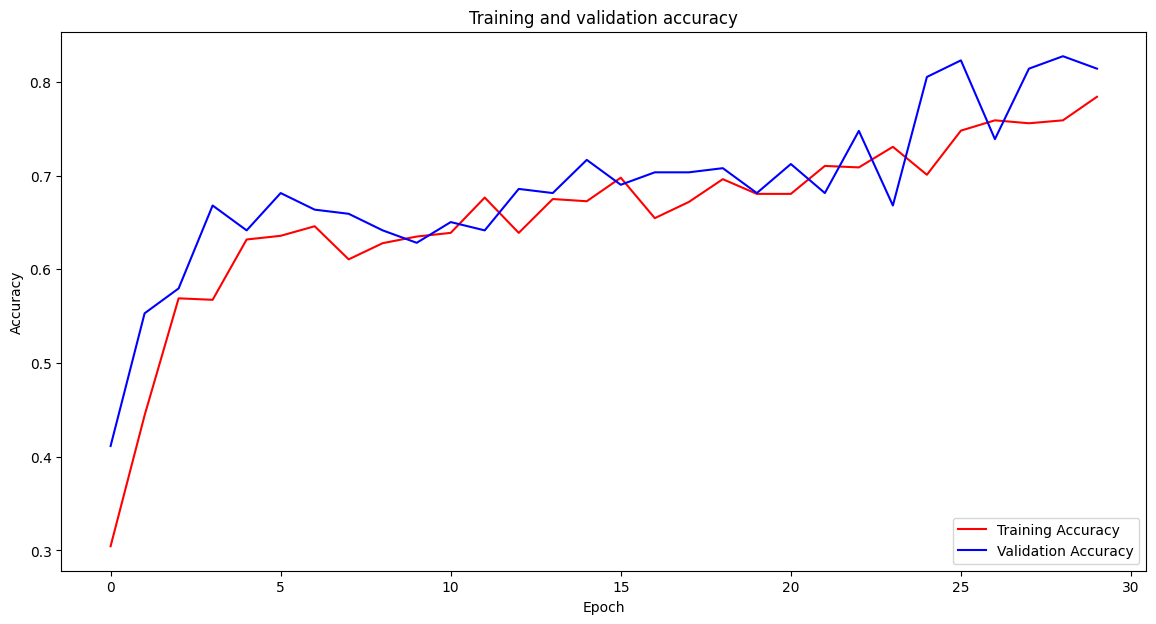

In [ ]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
plt.show()

***Checking Training and Validation Loss***

Text(0.5, 1.0, 'Training and validation loss')

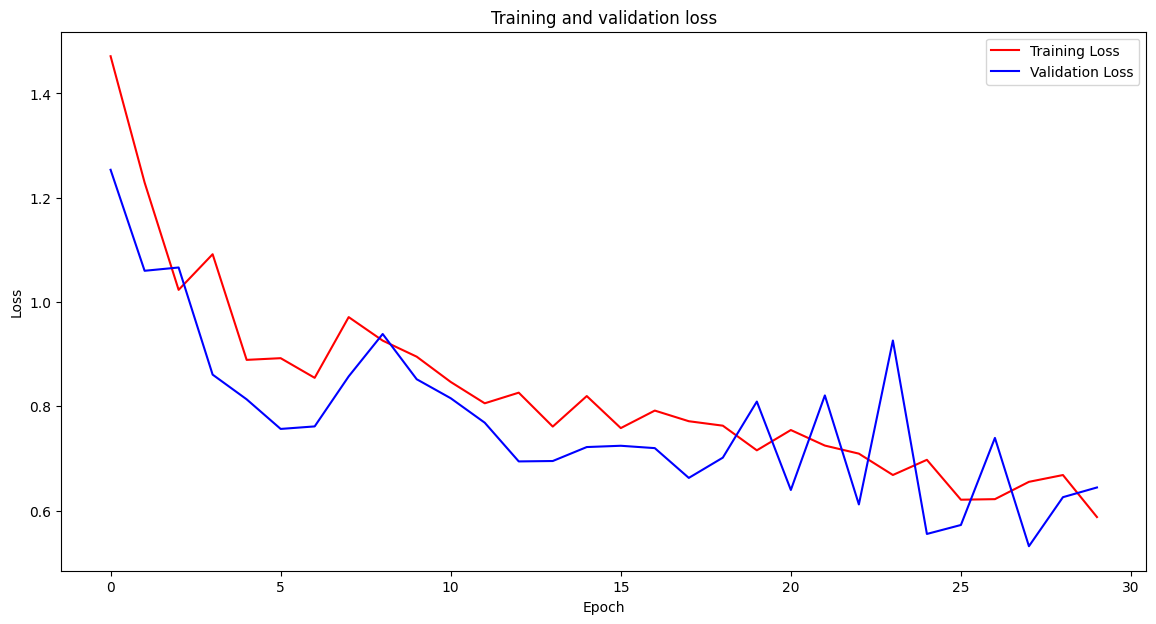

In [ ]:
fig2 = plt.figure(figsize=(14,7))
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss')

***Test PErformance on Test Data***

In [ ]:
import pandas as pd
import numpy as np
from keras.preprocessing.image import load_img, img_to_array

def preprocess_image(path):
    img = load_img(path, target_size = (img_height, img_width))
    a = img_to_array(img)
    a = np.expand_dims(a, axis = 0)
    a /= 255.
    return a

***Checking the Performance of Test Data Using Sample***

In [ ]:
# Read Test Images Dir and their labels
test_images_dir = '/content/dataset/alien_test/'
test_df = pd.read_csv('/content/dataset/test.csv')

# put them in a list
test_dfToList = test_df['Image_id'].tolist()
test_ids = [str(item) for item in test_dfToList]

test_images = [test_images_dir+item for item in test_ids]
test_preprocessed_images = np.vstack([preprocess_image(fn) for fn in test_images])
np.save('/content/test_preproc_CNN.npy', test_preprocessed_images)

In [ ]:
array = model.predict(test_preprocessed_images, batch_size=1, verbose=1)
answer = np.argmax(array, axis=1)
print(answer)

30/30 [==============================] - 1s 2ms/step
[1 0 3 3 0 0 1 0 0 1 4 0 2 1 2 2 2 2 2 2 3 3 3 4 4 4 4 4 4 4]


In [ ]:
test_df = pd.read_csv('/content/dataset/test.csv')
y_true = test_df['labels']
y_pred = array
print(y_true)

0     0
1     0
2     0
3     0
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    2
15    2
16    2
17    2
18    2
19    2
20    3
21    3
22    3
23    4
24    4
25    4
26    4
27    4
28    4
29    4
Name: labels, dtype: int64


In [ ]:
from sklearn.metrics import log_loss
loss = log_loss(y_true, y_pred, eps=1e-15, normalize=True, sample_weight=None, labels=None)

In [ ]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_true, answer)
conf_mat

array([[1, 1, 0, 2, 0],
       [5, 3, 1, 0, 1],
       [0, 0, 6, 0, 0],
       [0, 0, 0, 3, 0],
       [0, 0, 0, 0, 7]])

In [ ]:
train_dir = '/content/weather-data/train/'
classes = os.listdir(train_dir)

***Confusion Matrix for Accuracy Checking***

In [ ]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Reds):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = cm.round(2)
    else:
        cm=cm

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

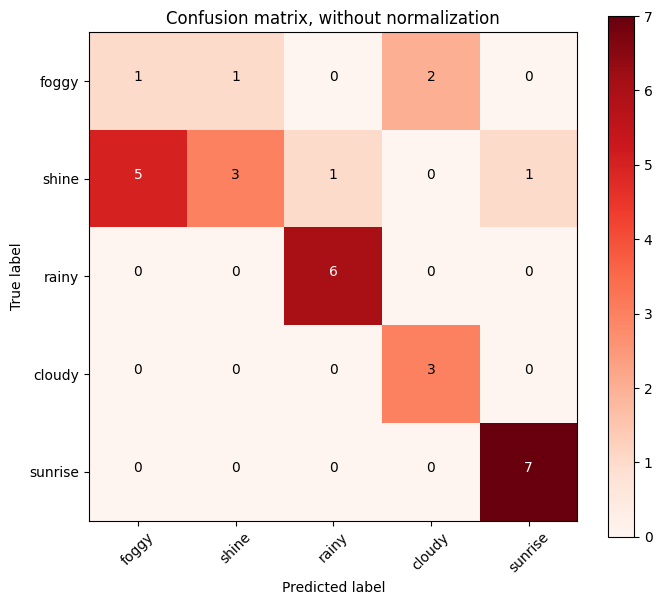

In [ ]:
np.set_printoptions(precision=2)

fig1 = plt.figure(figsize=(7,6))
plot_confusion_matrix(conf_mat, classes=classes, title='Confusion matrix, without normalization')
plt.show()